# Multicollinearity of Features

The objective here is to identify multicollinearity between our features.

# Table of Contents - TBD
1. [Step 1: Dealing with NaN values](#Step-1:-Dealing-with-NaN-values)
2. [Step 2: Converting data types](#Step-2:-Converting-data-types)
3. [Step 3: Categorical variables](#Step-3:-Categorical_variables)
3. [Step 4: Save our cleaned dataset for reusability](#Step-4:-Save-our-cleaned-dataset-for-reusability)
4. [Conclusion](#Conclusion)

## Step 1: Identifying multicollinearity

In [17]:
# Set auto reload
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
# Reload our cleaned dataset and perform date typing
import pandas as pd
import housing_data as hd

df = pd.read_csv('cleaned_kc_house_data.csv')

# We can see that the datetime format is not kept. Let's fix it
date_columns = ['date', 'yr_built', 'yr_renovated']

df = hd.format_date_columns(df, date_columns)

df.head()

,id,date,price,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,lat,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,7129300520,2014-10-13,221900.0,1180,5650,1180,0.0,1955-01-01,1955-01-01,47.5112,...,0,0,0,0,0,0,1,0,0,0
1,6414100192,2014-12-09,538000.0,2570,7242,2170,400.0,1951-01-01,1991-01-01,47.7210,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,2015-02-25,180000.0,770,10000,770,0.0,1933-01-01,1933-01-01,47.7379,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,2014-12-09,604000.0,1960,5000,1050,910.0,1965-01-01,1965-01-01,47.5208,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,2015-02-18,510000.0,1680,8080,1680,0.0,1987-01-01,1987-01-01,47.6168,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_pred= df.iloc[:,3:]
data_pred.head()

In [124]:
abs(data_pred.corr()) > 0.75

,sqft_living,sqft_lot,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,water_False,water_True,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
sqft_living,True,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_above,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_basement,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
lat,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
long,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living15,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_lot15,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
water_False,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
water_True,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False


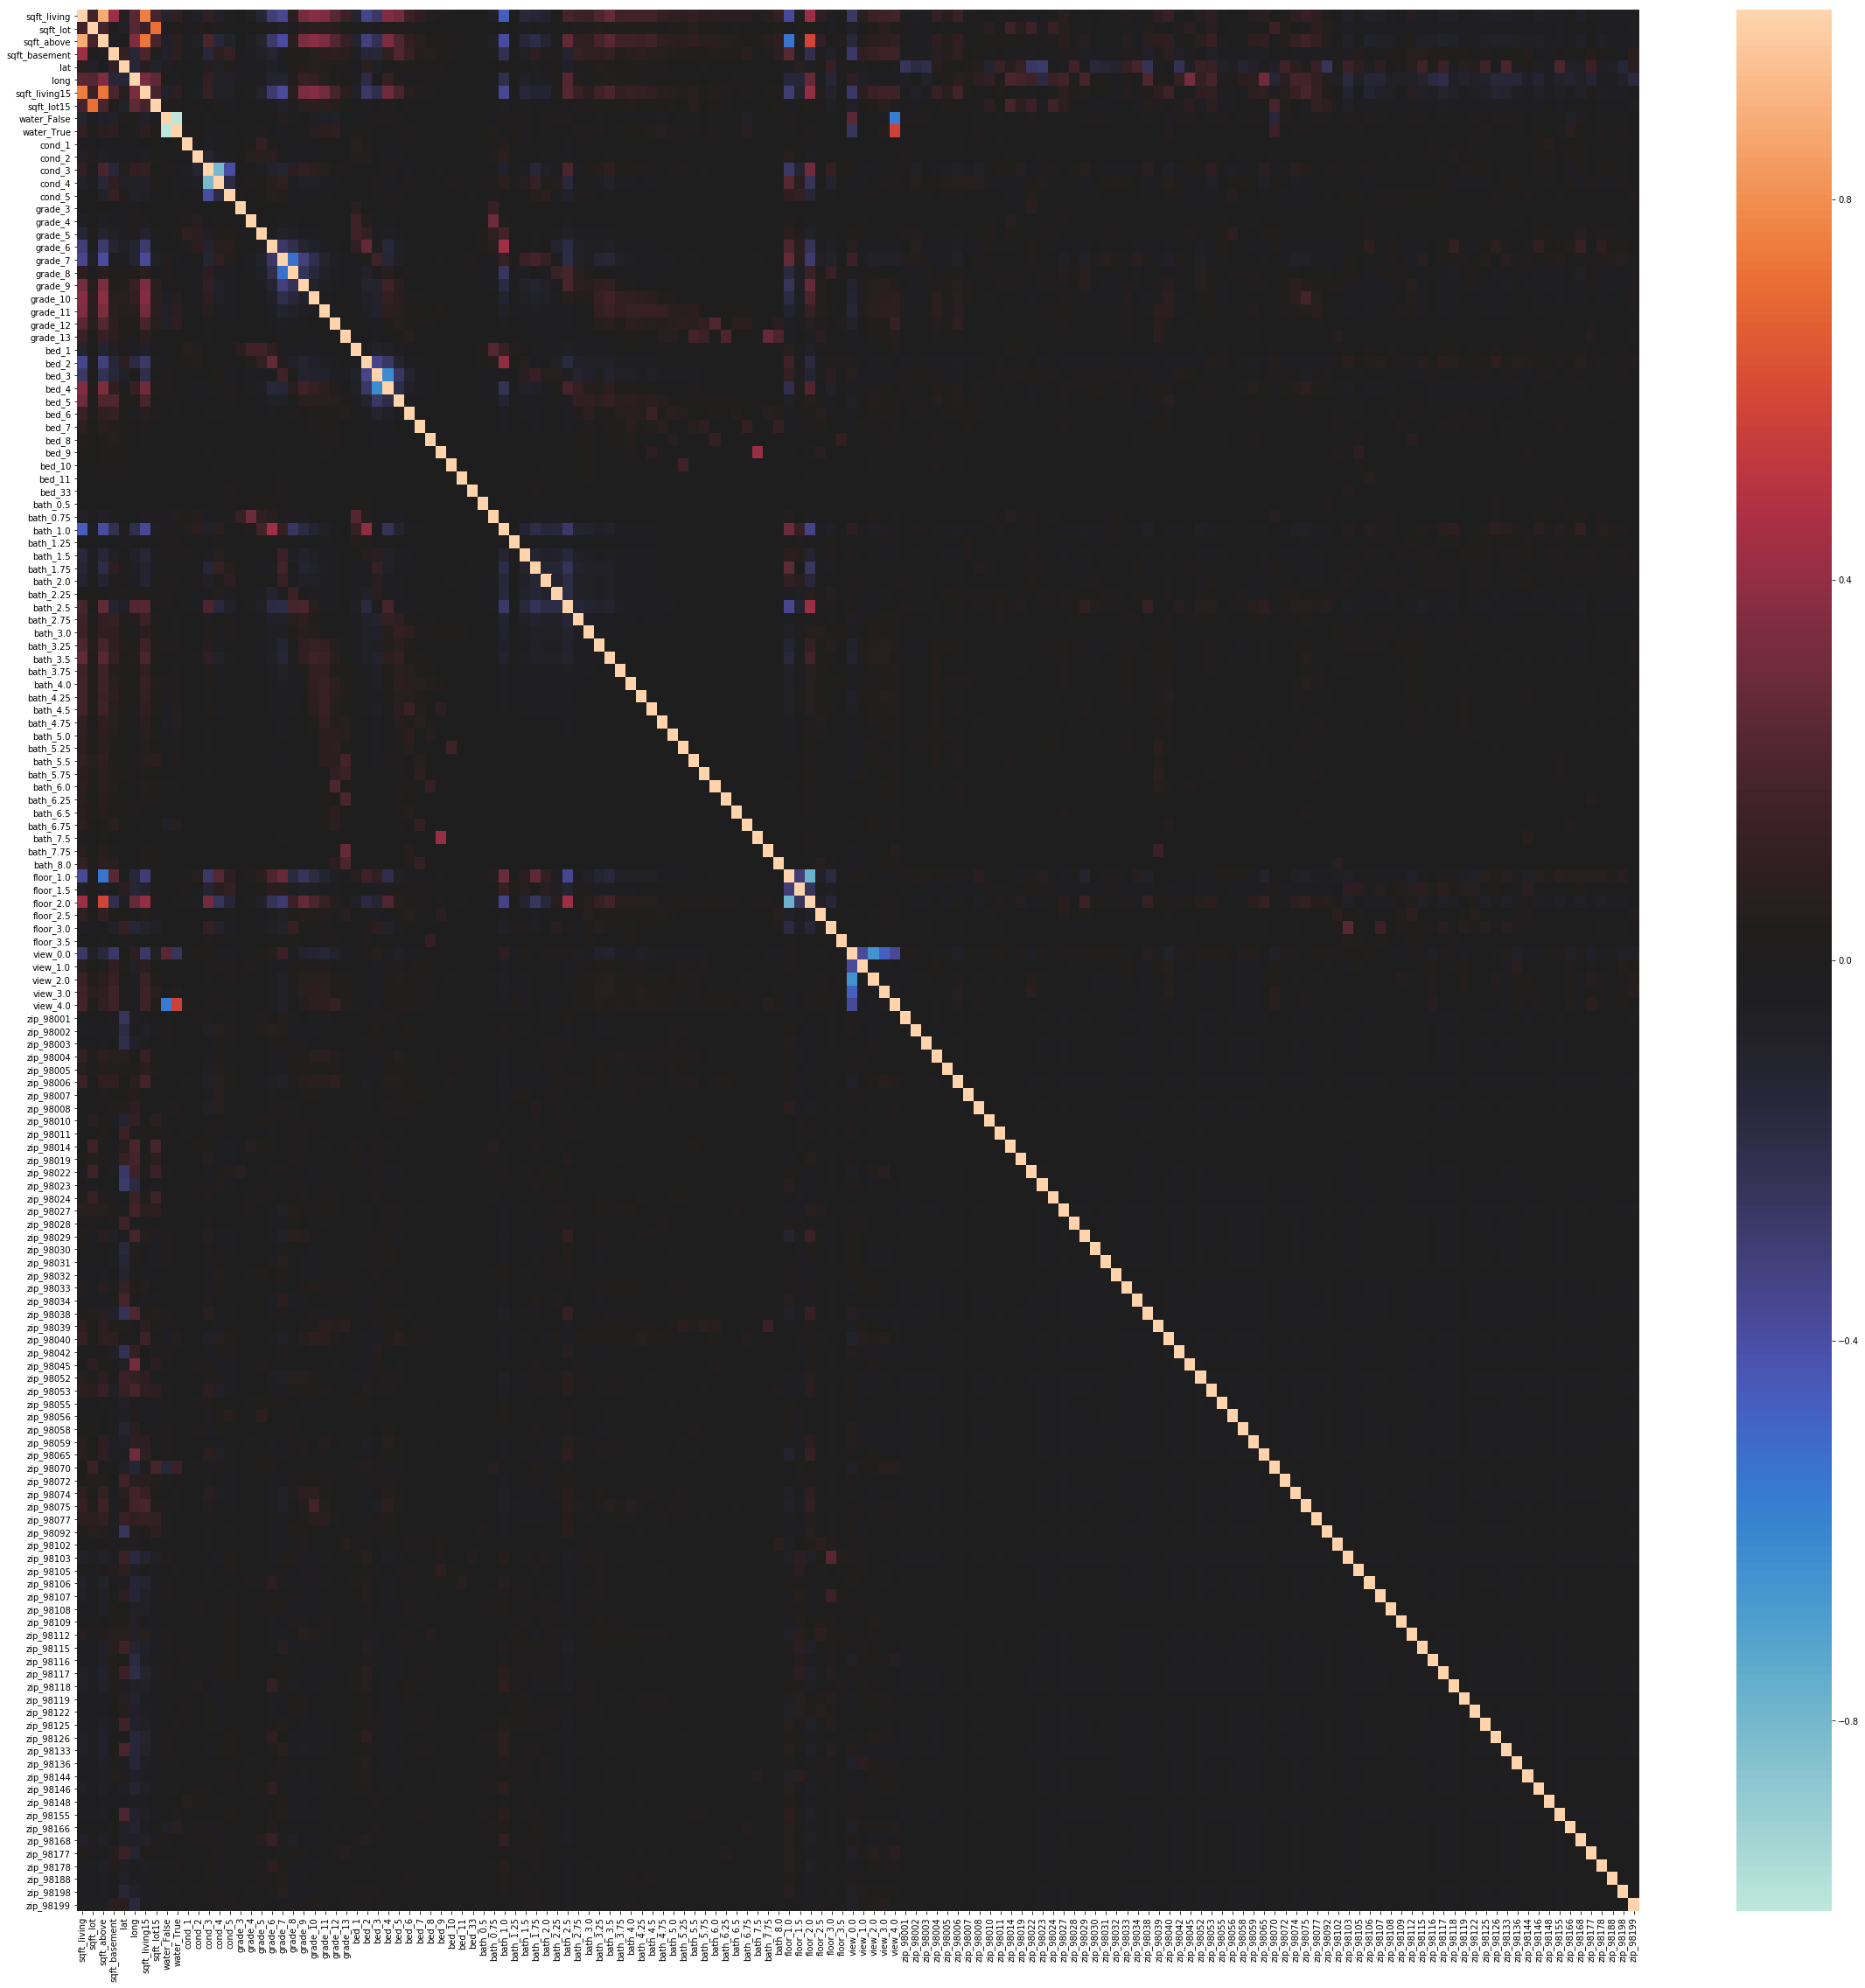

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

fig = plt.figure(figsize=(40,40))
sns.heatmap(data_pred.corr(), center=0);

**Conclusion** We can see some collinearity between sqft_living and sqft_lot, sqft_above, sqft_basement, sqft_living15, sqft_lot15 (At the top left corner - orange area)

In [12]:
from statsmodels.formula.api import ols

In [21]:
grade_columns = hd.get_prefixed_column_names(df, 'grade_')

print(grade_columns)

outcome = 'price'
x_cols = ['sqft_living', 'lat', 'long']

x_cols = ['sqft_living'] + grade_columns

predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

['grade_3', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12', 'grade_13']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     2730.
Date:                Mon, 06 May 2019   Prob (F-statistic):               0.00
Time:                        23:29:26   Log-Likelihood:            -2.9798e+05
No. Observations:               21597   AIC:                         5.960e+05
Df Residuals:                   21585   BIC:                         5.961e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.294e+05   2.23e+04     23.765      0.000    4.86e+05    5.73e+05
sqft_living   157.2485      2.783     56.501      0.000     151.793     162.704
grade_3     -3.492e+05   2.18e+05     -1.602      0.109   -7.77e+05    7.81e+04
grade_4     -4.245e+05   4.71e+04     -9.018      0.000   -5.17e+05   -3.32e+05
grade_5     -4.355e+05   2.57e+04    -16.967      0.000   -4.86e+05   -3.85e+05
grade_6     -4.149e+05    2.2e+04    -18.884      0.000   -4.58e+05   -3.72e+05
grade_7     -3.925e+05   2.14e+04    -18.380      0.000   -4.34e+05   -3.51e+05
grade_8       -3.3e+05   2.13e+04    -15.494      0.000   -3.72e+05   -2.88e+05
grade_9     -2.067e+05   2.15e+04     -9.604      0.000   -2.49e+05   -1.65e+05
grade_10    -1.064e+04   2.22e+04     -0.479      0.632   -5.42e+04    3.29e+04
grade_11     2.772e+05   2.42e+04     11.431      0.000     2.3e+05    3.25e+05
grade_12     8.115e+05   3.22e+04     25.185      0.000    7.48e+05    8.75e+05
grade_13     2.005e+06   6.52e+04     30.749      0.000    1.88e+06    2.13e+06
==============================================================================
Omnibus:                    13860.549   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           473194.517
Skew:                           2.575   Prob(JB):                         0.00
Kurtosis:                      25.346   Cond. No.                     2.87e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.36e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [132]:
data_per_zipcode = df[df['zip_98146'] == 1]


outcome = 'price'
x_cols = ['sqft_living', 'water_True']
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=data_per_zipcode).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     193.0
Date:                Mon, 06 May 2019   Prob (F-statistic):           1.00e-53
Time:                        17:44:01   Log-Likelihood:                -3819.9
No. Observations:                 288   AIC:                             7646.
Df Residuals:                     285   BIC:                             7657.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.947e+04    2.2e+04      0.883      0.378   -2.39e+04    6.29e+04
sqft_living   203.3295     12.718     15.988      0.000     178.297     228.362
water_True    4.96e+05   5.87e+04      8.450      0.000     3.8e+05    6.12e+05
==============================================================================
Omnibus:                       96.541   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              393.515
Skew:                           1.363   Prob(JB):                     3.54e-86
Kurtosis:                       8.037   Cond. No.                     1.25e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

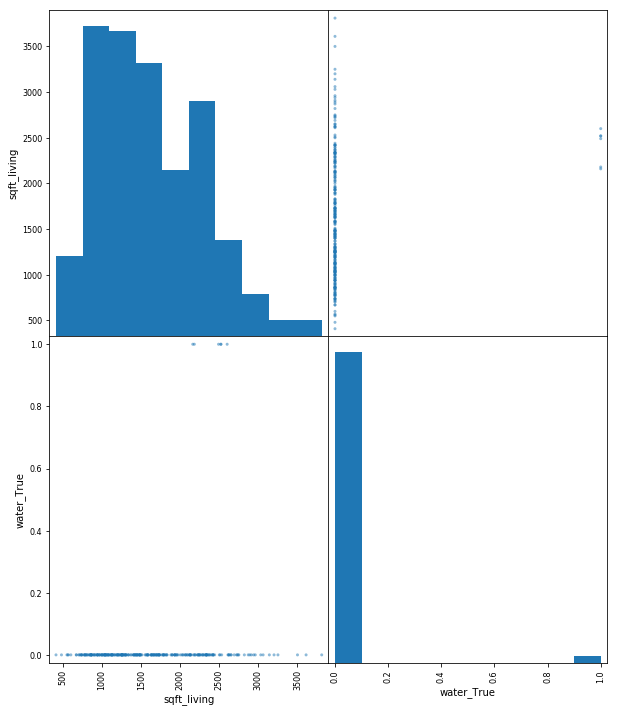

In [133]:
pd.plotting.scatter_matrix(data_per_zipcode[x_cols], figsize=(10,12));

In [134]:
import numpy as np

non_normal = ['sqft_living']

log_sqft_living = np.log(data_per_zipcode['sqft_living'])

scaled_sqft_living = (log_sqft_living-np.mean(log_sqft_living))/np.sqrt(np.var(log_sqft_living))

data_fin = pd.DataFrame([])
data_fin['sqft_living']= scaled_sqft_living

price = data_per_zipcode['price']

data_fin = pd.concat([price, data_fin])

data_ols = pd.concat([price, scaled_sqft_living], axis=1)

data_ols.head()
# for feat in non_normal:
#     data_per_zipcode[feat] = data_per_zipcode[feat].apply(lambda x: np.log(x))
#     data_per_zipcode_98146[feat] = data_per_zipcode_98146[feat].map(lambda x: np.log(x))
# pd.plotting.scatter_matrix(data_per_zipcode_98146[x_cols], figsize=(10,12));

,price,sqft_living
8,229500.0,0.423851
160,255000.0,0.770610
217,445838.0,0.980015
225,390000.0,-0.415129
324,232000.0,-0.434194


In [135]:
outcome = 'price'
predictors = data_ols.drop('price', axis=1)
#predictors = predictors.drop("orig_3",axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [136]:
model = ols(formula= formula, data=data_ols).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     196.0
Date:                Mon, 06 May 2019   Prob (F-statistic):           2.85e-34
Time:                        17:45:03   Log-Likelihood:                -3868.1
No. Observations:                 288   AIC:                             7740.
Df Residuals:                     286   BIC:                             7748.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3.595e+05   9739.770     36.910      0.000     3.4e+05    3.79e+05
sqft_living  1.363e+05   9739.770     13.999      0.000    1.17e+05    1.56e+05
==============================================================================
Omnibus:                      146.467   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              786.577
Skew:                           2.084   Prob(JB):                    1.57e-171
Kurtosis:                       9.940   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

ValueError: zero-size array to reduction operation minimum which has no identity

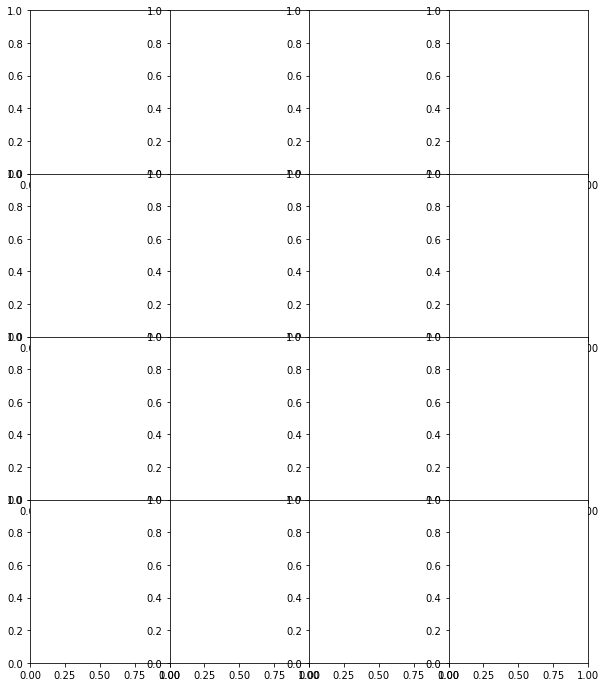

In [121]:
pd.plotting.scatter_matrix(data_per_zipcode_98146[x_cols], figsize=(10,12));

In [114]:
outcome = 'price'
x_cols = ['sqft_living', 'lat', 'long', 'water_True']
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=data_per_zipcode_98146).fit()
model.summary()

ValueError: zero-size array to reduction operation maximum which has no identity

In [ ]:
selected_predictors = []

In [ ]:
pd.plotting.scatter_matrix(data[x_cols], figsize=(10,12));